# Model for Hand Landmarks

### Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("data/landmark_locations_2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WRIST_X              1551 non-null   float64
 1   WRIST_Y              1551 non-null   float64
 2   WRIST_Z              1551 non-null   float64
 3   Letter               1551 non-null   object 
 4   THUMB_CMC_X          1551 non-null   float64
 5   THUMB_CMC_Y          1551 non-null   float64
 6   THUMB_CMC_Z          1551 non-null   float64
 7   THUMB_MCP_X          1551 non-null   float64
 8   THUMB_MCP_Y          1551 non-null   float64
 9   THUMB_MCP_Z          1551 non-null   float64
 10  THUMB_IP_X           1551 non-null   float64
 11  THUMB_IP_Y           1551 non-null   float64
 12  THUMB_IP_Z           1551 non-null   float64
 13  THUMB_TIP_X          1551 non-null   float64
 14  THUMB_TIP_Y          1551 non-null   float64
 15  THUMB_TIP_Z          1551 non-null   f

In [4]:
df['Letter'].unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
      dtype=object)

In [5]:
df.head()

,WRIST_X,WRIST_Y,WRIST_Z,Letter,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,...,PINKY_MCP_Z,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z
0,0.598399,0.875106,-8.433434e-07,a,0.513282,0.807830,-0.036275,0.461680,0.596655,-0.044751,...,-0.011815,0.663012,0.353402,-0.039463,0.635124,0.422881,-0.035738,0.623689,0.497932,-0.024391
1,0.590785,0.877347,-8.652935e-07,a,0.505269,0.813887,-0.035017,0.453138,0.605505,-0.043443,...,-0.013110,0.654986,0.357806,-0.042105,0.626059,0.430473,-0.038501,0.613227,0.509142,-0.026577
2,0.587772,0.890769,-9.089115e-07,a,0.499409,0.831820,-0.039746,0.444853,0.614644,-0.047963,...,-0.012133,0.649930,0.362550,-0.041107,0.622825,0.437159,-0.037401,0.609114,0.515599,-0.025853
3,0.573666,0.909152,-9.127738e-07,a,0.486787,0.843863,-0.035172,0.430942,0.624661,-0.042478,...,-0.013436,0.640726,0.370799,-0.044372,0.611677,0.450837,-0.040172,0.599418,0.534476,-0.027471
4,0.585612,0.917239,-9.609118e-07,a,0.494183,0.847540,-0.038450,0.435153,0.623197,-0.047158,...,-0.014838,0.657533,0.355832,-0.046120,0.627067,0.438382,-0.039517,0.614402,0.523638,-0.024565


In [6]:
df.columns

Index(['WRIST_X', 'WRIST_Y', 'WRIST_Z', 'Letter', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z',
       'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X', 'THUMB_TIP_Y',
       'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y',
       'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y',
       'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y',
       'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y',
       'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y',
       'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y',
       'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_PIP_Z', 'RING_FINGER_DIP

### Extract Data

In [7]:
# Extract Data
features = ['WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X', 'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 
        'THUMB_TIP_X','THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 
        'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 
        'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X', 
        'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RING_FINGER_DIP_X', 
        'RING_FINGER_DIP_Y', 'RING_FINGER_DIP_Z', 'RING_FINGER_TIP_X', 'RING_FINGER_TIP_Y', 'RING_FINGER_TIP_Z','PINKY_MCP_X', 'PINKY_MCP_Y', 'PINKY_MCP_Z', 'PINKY_PIP_X', 'PINKY_PIP_Y', 'PINKY_PIP_Z',
        'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_DIP_Z', 'PINKY_TIP_X', 'PINKY_TIP_Y', 'PINKY_TIP_Z']
X = df[features]
y = df["Letter"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

No need to scale data because they're already scaled on range 0-1.

### Hyperparameter Tuning

Selecting K with 5-fold cross validation.

In [8]:
# Defining a range of k values to test
k_values = list(range(1, 25, 2))

# Initialize a list for cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    print(k, scores)
    # Average all 5 scores
    cv_scores.append(scores.mean())

1 [1. 1. 1. 1. 1.]
3 [1. 1. 1. 1. 1.]
5 [1.         1.         1.         1.         0.99193548]
7 [0.99596774 0.99596774 0.99596774 0.99596774 0.98790323]
9 [0.99596774 0.99596774 0.99193548 0.99596774 0.98790323]
11 [0.99193548 0.99596774 0.98790323 0.99596774 0.98790323]
13 [0.99193548 0.99193548 0.98790323 0.99596774 0.98790323]
15 [0.99193548 0.99193548 0.98387097 0.99193548 0.98790323]
17 [0.98790323 0.98790323 0.97983871 0.98790323 0.98790323]
19 [0.98387097 0.98790323 0.97580645 0.98790323 0.98387097]
21 [0.97177419 0.97580645 0.96774194 0.98387097 0.97983871]
23 [0.97580645 0.97177419 0.96774194 0.97983871 0.97580645]


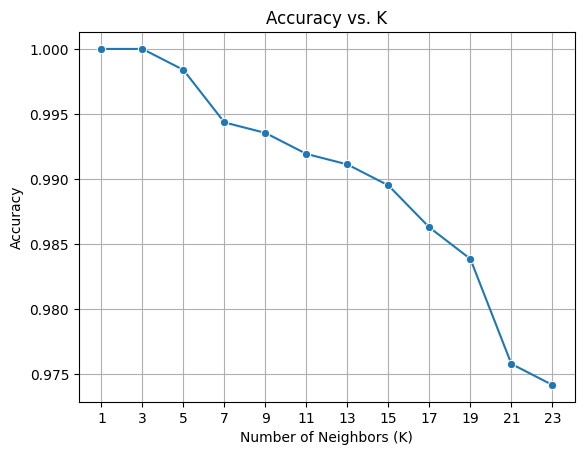

In [9]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

Chose K=9 for my model.

### Building the model

In [10]:
# Create the model
model = KNeighborsClassifier(n_neighbors=9)

# Train the model
model = model.fit(X_train, y_train)

### Evaluations

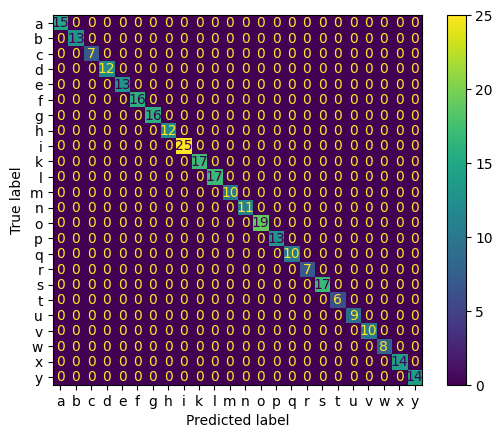

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a confusion matrix
labels = df["Letter"].unique()
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot()

In [12]:
# Accuracy as shown by the confusion matrix
model.score(X_test, y_test)

1.0